In [329]:
import numpy as np
import pandas as pd

In [330]:
df_trn = pd.read_csv('train.csv')
df_tst = pd.read_csv('test.csv')

df = pd.concat([df_trn,df_tst])

In [331]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,997.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,998.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0


In [332]:
# splitting in X (features) and y (target)
X_df = df[df.columns[:-2]]

y_df = pd.DataFrame(df['price_range'])
y_df.columns = ['price_range']

In [333]:
X_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [334]:
y_df

,price_range
0,1.0
1,2.0
2,2.0
3,2.0
4,1.0
...,...
995,NaN
996,NaN
997,NaN
998,NaN


# 2. Data Preprocessing

## 2.1 Check missing Values and categorical values

In [335]:
# check if there are missing values

print('Missing values in X_df: {}'.format(X_df.isnull().values.any()))
print('Missing values in y_df: {}'.format(y_df.isnull().values.any()))

Missing values in X_df: False
Missing values in y_df: True


In [336]:
len(np.where(y_df.isnull().values == True)[0])

1000

In [337]:
features_names = X_df.columns
X_df = pd.DataFrame(X_df.values[np.where(y_df.isnull().values == False)[0]])
X_df.columns = features_names

y_df = pd.DataFrame(y_df.values[np.where(y_df.isnull().values == False)[0]])
y_df.columns = ['price_range']

In [338]:
# check if there are categorical features

numCols = X_df.select_dtypes('number').columns
catCols = X_df.select_dtypes('object').columns

numCols= list(set(numCols))
catCols= list(set(catCols))

print('Number of numerical features: {}'.format(len(numCols)))
print('Number of categorical features: {}'.format(len(catCols)))


Number of numerical features: 20
Number of categorical features: 0


## 2.2 Feature Scaling

In [339]:
# features scaling preserving the flag features

from sklearn.preprocessing import StandardScaler

def get_scaling(X_df, flag_features):
    
    '''
    The function takes in input the original dataframe X_df and
    a list of index corresponding to the flag features 
    (i.e., features with values 0,1,2 etc., for example obtained 
    with One Hot Encoder if categorical in the original dataframe).

    First, the function scales all the features.

    The flag features should not be scaled: thus, the function
    drops all the flag features in a for loop from the scaled dataframe.

    Then, the flag features from the original dataframe are added to the
    scaled dataframe with their original values.
    '''
    
    sc = StandardScaler()

    X_scaled = pd.DataFrame(sc.fit_transform(X_df))

    X_scaled.columns = X_df.columns
    
    X_flag = []
    flag_names = []
    
    for flg_ftrs in flag_features:
        
        X_scaled = X_scaled.drop([X_df.columns[flg_ftrs]],axis = 1)
        
        print('Flag feature with index {}: {}'.format(flg_ftrs,X_df.columns[flg_ftrs]))
        
        X_flag.append(pd.DataFrame(X_df.values[:,flg_ftrs]))
        flag_names.append(X_df.columns[flg_ftrs])
        
    X_flag = pd.concat(X_flag, axis = 1)
    X_flag.columns = flag_names
    
    X_scaled = pd.concat([X_scaled, X_flag],axis = 1)
    
    return X_scaled

In [340]:
X_scaled = get_scaling(X_df, flag_features = [1,3,4,5,17,18,19])

Flag feature with index 1: blue
Flag feature with index 3: dual_sim
Flag feature with index 4: fc
Flag feature with index 5: four_g
Flag feature with index 17: three_g
Flag feature with index 18: touch_screen
Flag feature with index 19: wifi


In [341]:
X_scaled

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,fc,four_g,three_g,touch_screen,wifi
0,-0.902597,0.830779,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.495139,-1.253064,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2,-1.537686,-1.253064,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1.0,1.0,2.0,1.0,1.0,1.0,0.0
3,-1.419319,1.198517,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.325906,-0.395011,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1.0,0.0,13.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,-1.253064,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1996,1.653694,1.321096,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1997,1.530773,-0.762748,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1998,0.622527,-0.762748,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.0,0.0,4.0,1.0,1.0,1.0,1.0


## 2.3 Visualize data distribution

<AxesSubplot:ylabel='Count'>

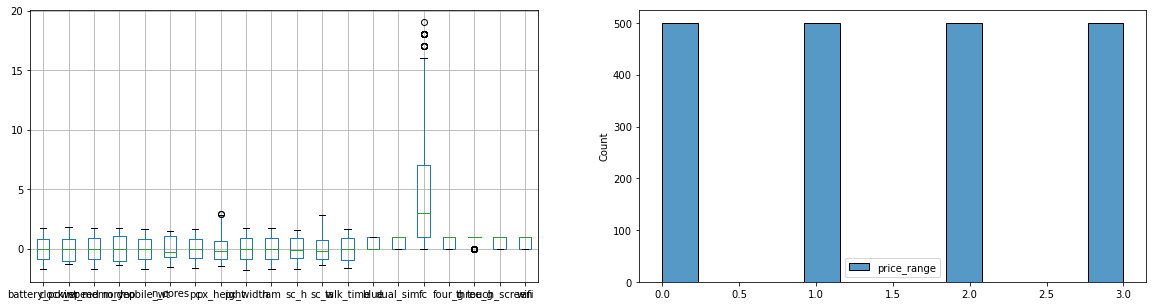

In [342]:
# features distribution after scaling

import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize = (20,5))

ax = fig.add_subplot(1,2,1)
X_scaled.boxplot()

ax = fig.add_subplot(1,2,2)
sns.histplot(y_df)

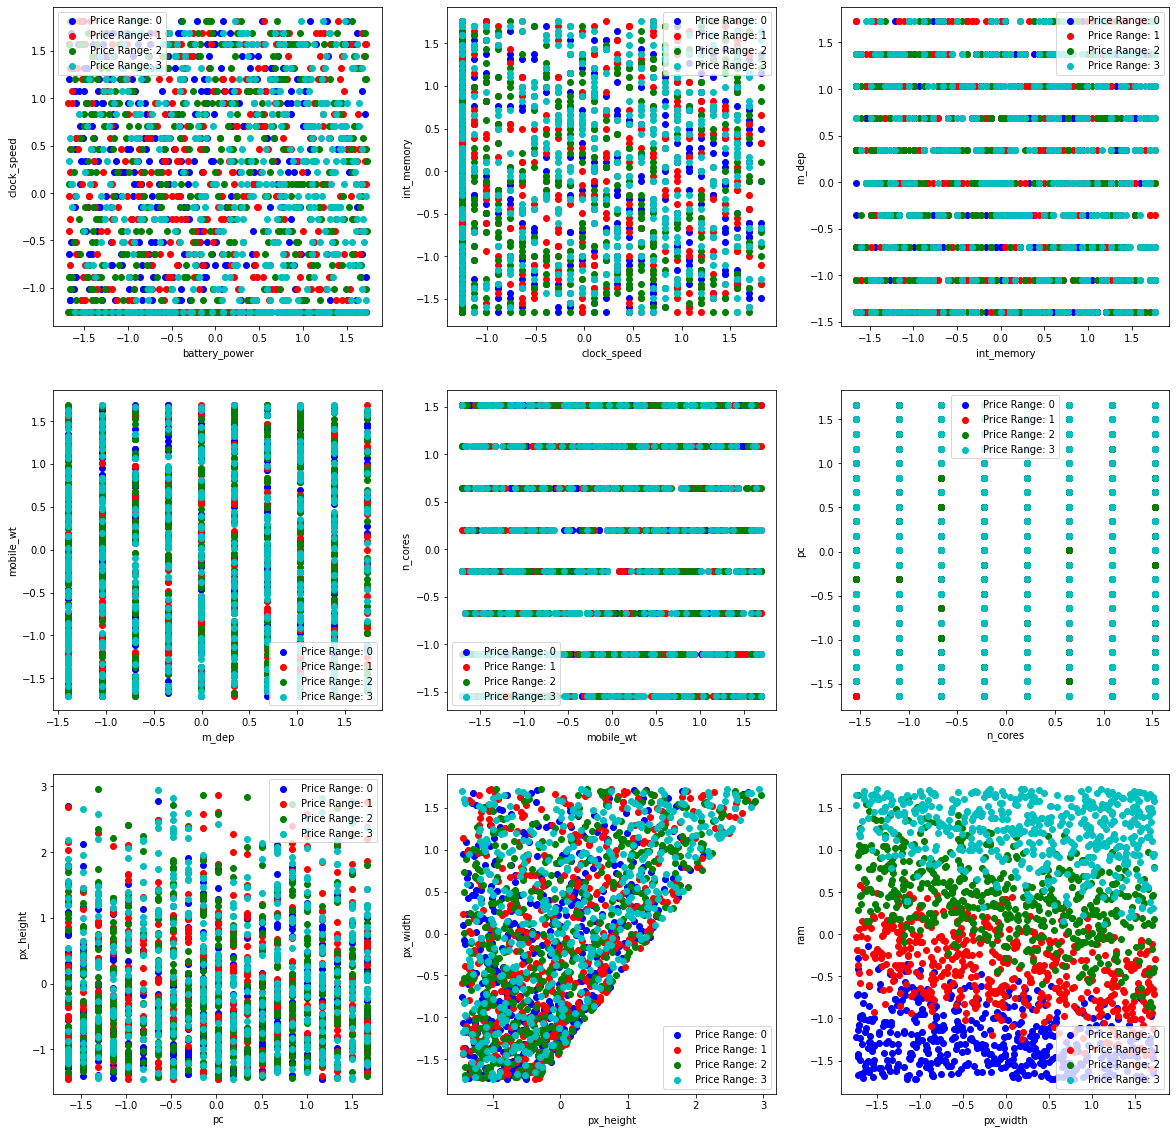

In [352]:
fig = plt.figure(figsize = (20,20))

for i in range(9):
    
    fig.add_subplot(3,3,i+1)
    
    ax_1 = i
    ax_2 = i+1

    plt.scatter(X_scaled.values[np.where(y_df == 0),ax_1],X_scaled.values[np.where(y_df == 0),ax_2], c = 'b')
    plt.scatter(X_scaled.values[np.where(y_df == 1),ax_1],X_scaled.values[np.where(y_df == 1),ax_2], c = 'r')
    plt.scatter(X_scaled.values[np.where(y_df == 2),ax_1],X_scaled.values[np.where(y_df == 2),ax_2], c = 'g')
    plt.scatter(X_scaled.values[np.where(y_df == 3),ax_1],X_scaled.values[np.where(y_df == 3),ax_2], c = 'c')
    
    plt.xlabel(X_scaled.columns[ax_1])
    plt.ylabel(X_scaled.columns[ax_2])
    plt.legend(['Price Range: 0','Price Range: 1', 'Price Range: 2', 'Price Range: 3'])




array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>],
       [<AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>],
       [<AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>,
        <AxesSubplot:title={'center':'sc_w'}>],
       [<AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>],
       [<AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>]

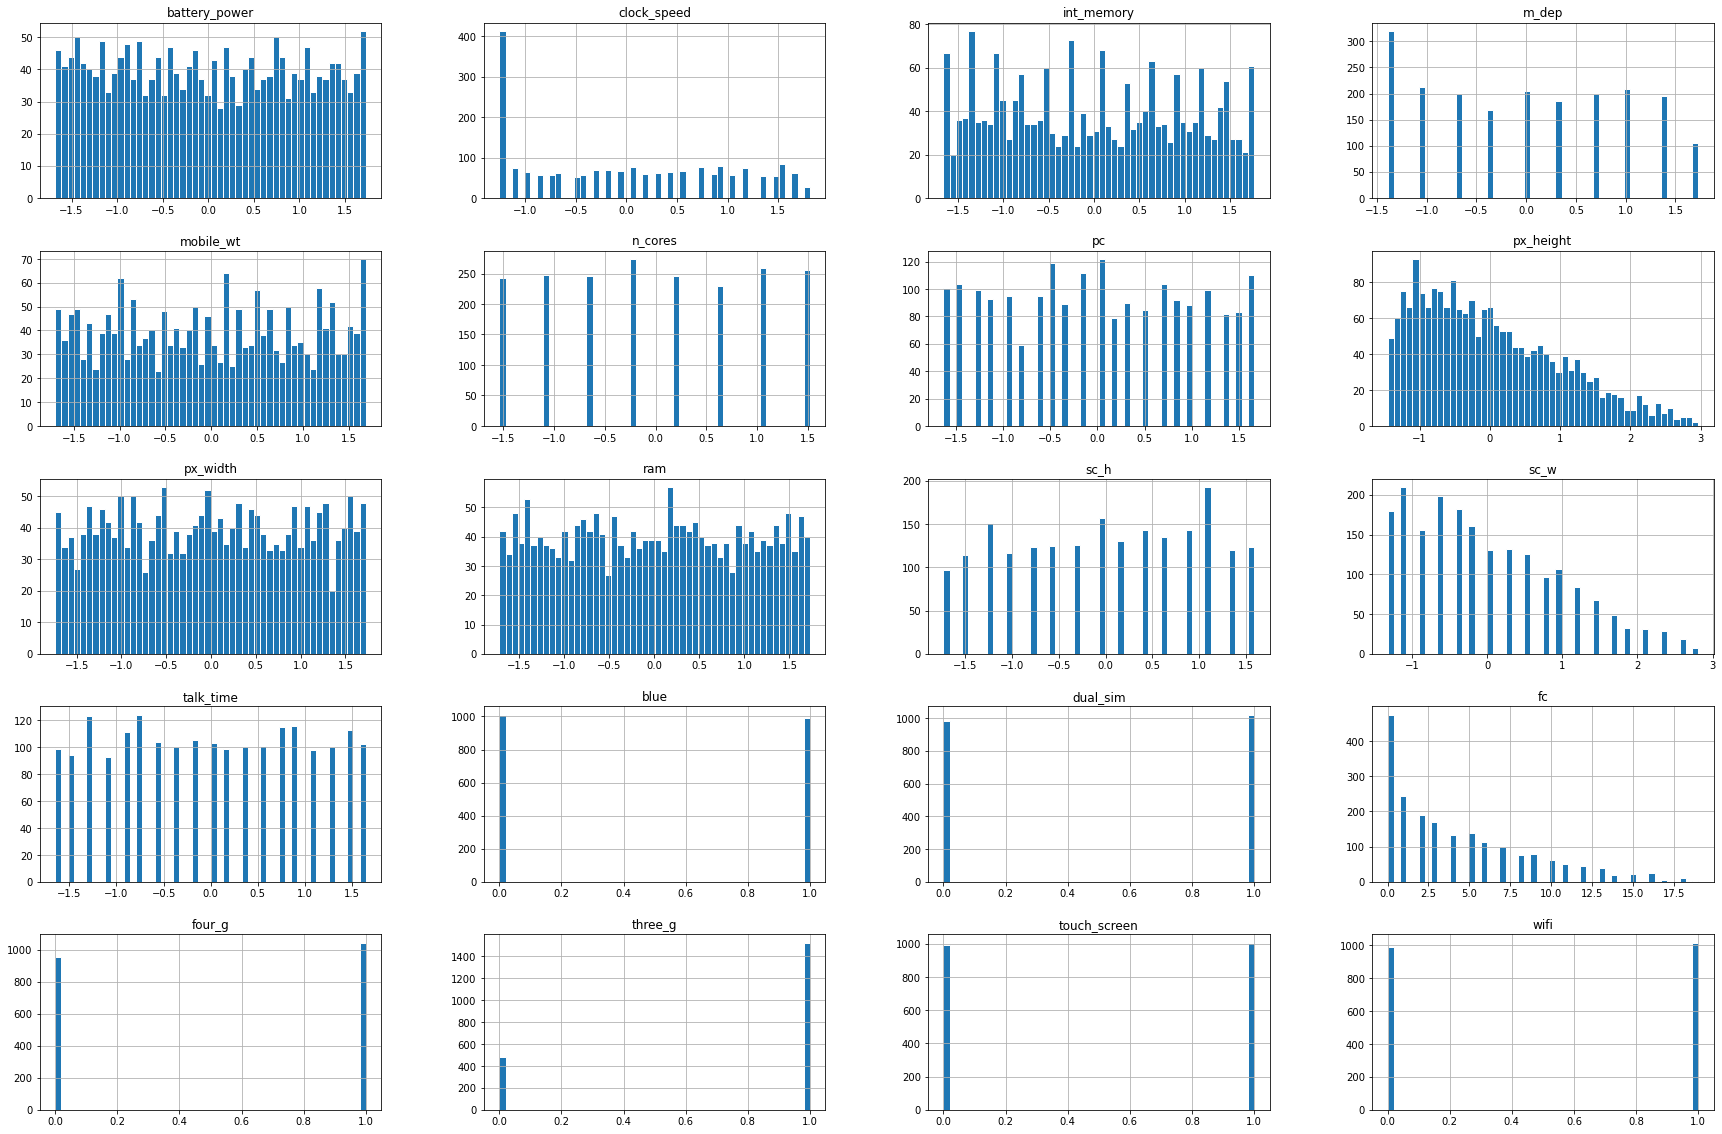

In [353]:
features = X_scaled.columns


X_scaled[features].hist(bins = 50, figsize = (30,20), edgecolor='white')

# 3. Features Selection using Random Forest Classifier with number of features chosen via Cross-Validation

In [354]:
from sklearn.ensemble import RandomForestClassifier


def get_RF_features_importances(X,y,n_features, plot):
    
    rf = RandomForestClassifier()
    
    rf.fit(X,y)
    
    features_names = X.columns
    
    data = {'feature_name' : features_names,'feature_importance' : rf.feature_importances_}
    
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by = ['feature_importance'], ascending=False,inplace=True)
    
    selected_features = fi_df['feature_name'].values[:n_features]
    
    X_rf = X[selected_features]
    
    if plot:

        #Define size of bar plot
        plt.figure(figsize = (20,16))
        #Plot Searborn bar chart
        sns.barplot(x = fi_df['feature_importance'], y = fi_df['feature_name'])
        #Add chart labels
        plt.title('Random Forest Feature Importance')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature Name')
    

    return X_rf

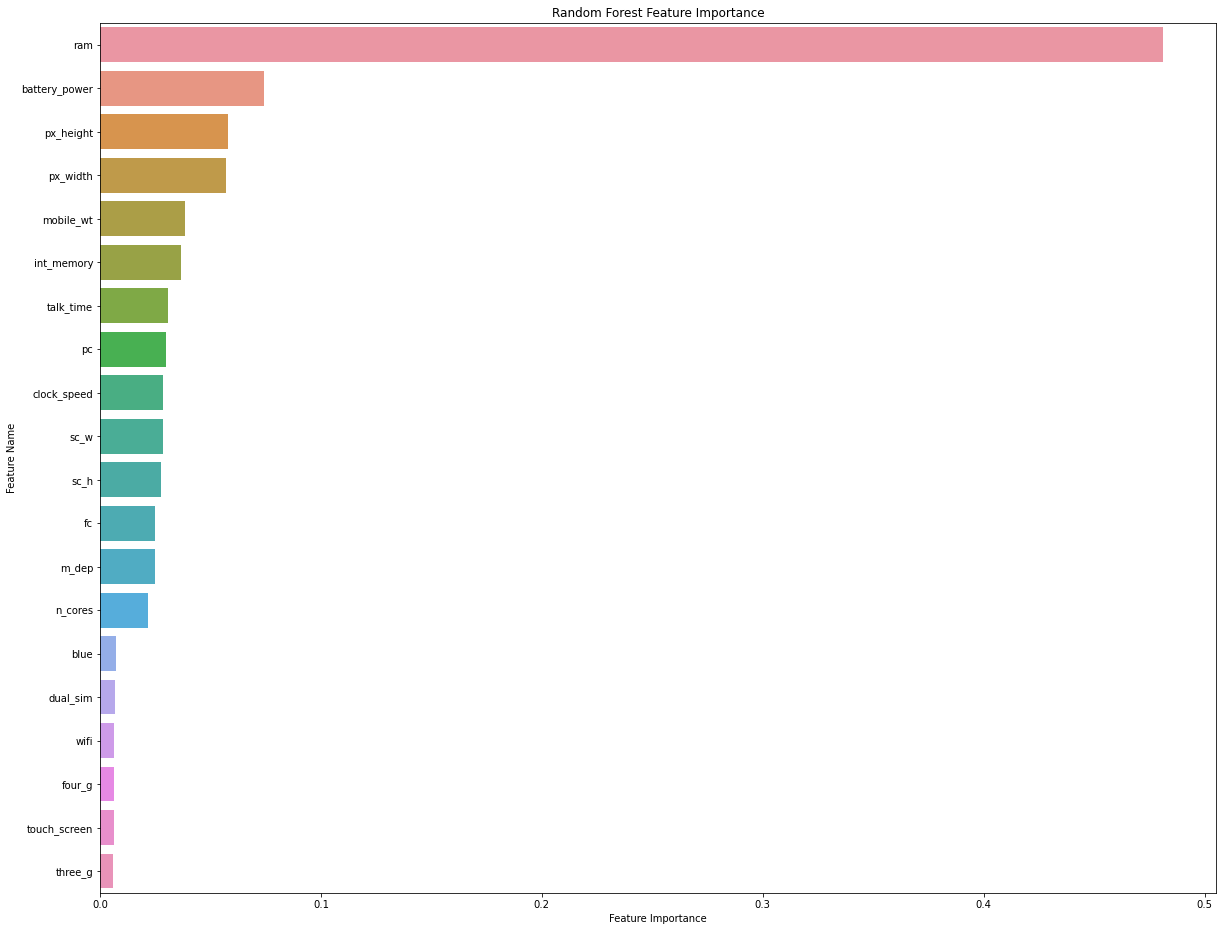

In [355]:
X,y = X_scaled, y_df

n_features = 10

X_rf = get_RF_features_importances(X,y.values.ravel(),n_features, plot = True)


Text(0, 0.5, 'Cross-Val Accuracy')

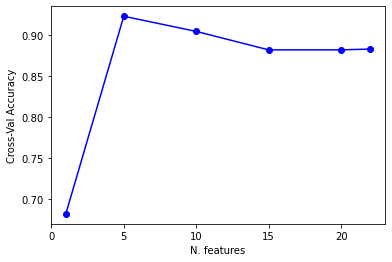

In [356]:
from sklearn.model_selection import cross_val_score

cv = 10

n_features = [1, 5, 10, 15, 20, 22]

cv_score = []


for n_ftrs in n_features:
    
    X_rf = get_RF_features_importances(X,y.values.ravel(),n_ftrs, plot = False)

    rf_clf = RandomForestClassifier()
    
    cross_val = cross_val_score(estimator = rf_clf, X = X_rf.values, y = y.values.ravel(), cv = cv)
    
    cv_score.append(np.average(cross_val))
    
    
plt.plot(np.array(n_features),np.array(cv_score),'bo-')
plt.xlabel('N. features')
plt.ylabel('Cross-Val Accuracy')

# 4. Data Analysis on the Preprocessed Dataset

In [387]:
# first we get Random Forest dataset for the original dataset, not training/test separately

n_features = 5

X_rf = get_RF_features_importances(X,y.values.ravel(), n_features = n_features, plot = False)

X_rf

,ram,battery_power,px_height,px_width,mobile_wt
0,0.391703,-0.902597,-1.408949,-1.146784,1.349249
1,0.467317,-0.495139,0.585778,1.704465,-0.120059
2,0.441498,-1.537686,1.392684,1.074968,0.134244
3,0.594569,-1.419319,1.286750,1.236971,-0.261339
4,-0.657666,1.325906,1.268718,-0.091452,0.021220
...,...,...,...,...,...
1995,-1.342799,-1.011860,1.300273,1.477661,-0.967737
1996,-0.085031,1.653694,0.608317,1.651235,1.320993
1997,0.860139,1.530773,0.502383,0.880565,-0.911225
1998,-1.157454,0.622527,-0.696707,-1.345816,0.134244


## 4.1 Features Correlations

<AxesSubplot:>

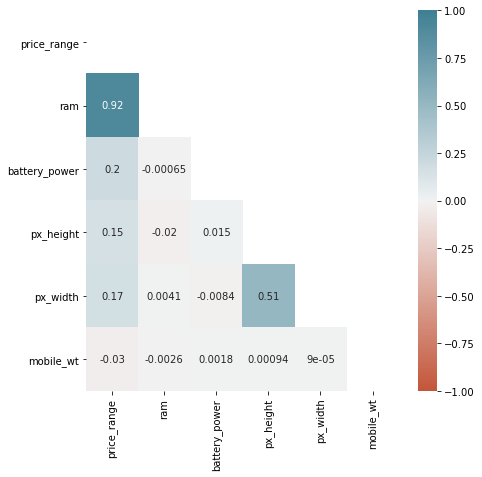

In [388]:
fig, ax = plt.subplots(figsize = (7,7))

mask = np.zeros_like(pd.concat([y,X_rf],axis = 1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(pd.concat([y,X_rf],axis = 1).corr(), 
            mask=mask,
            vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

Text(0, 0.5, 'Feature Name')

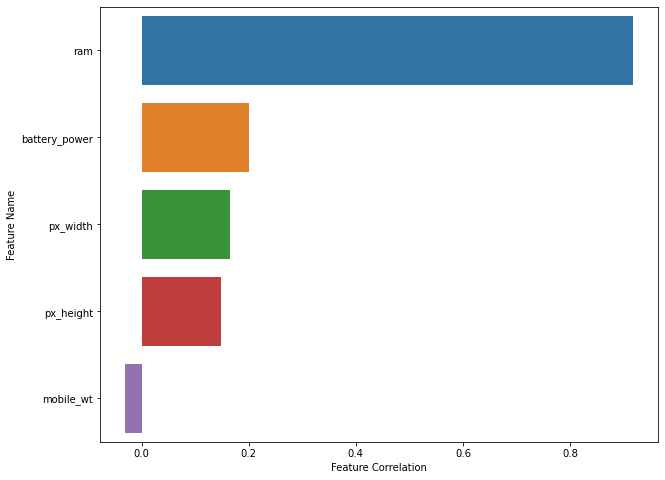

In [389]:
features_names = X_rf.columns

corr = pd.concat([y,X_rf],axis = 1).corr().values[0,1:]
    
data = {'feature_name' : features_names, 'corr' : corr}
    
corr_df = pd.DataFrame(data)
    
#Sort the DataFrame in order decreasing feature importance
corr_df.sort_values(by = ['corr'], ascending = False,inplace=True)

plt.figure(figsize = (10,8))
#Plot Searborn bar chart
sns.barplot(x = corr_df['corr'], y = corr_df['feature_name'])
#Add chart labels
plt.xlabel('Feature Correlation')
plt.ylabel('Feature Name')

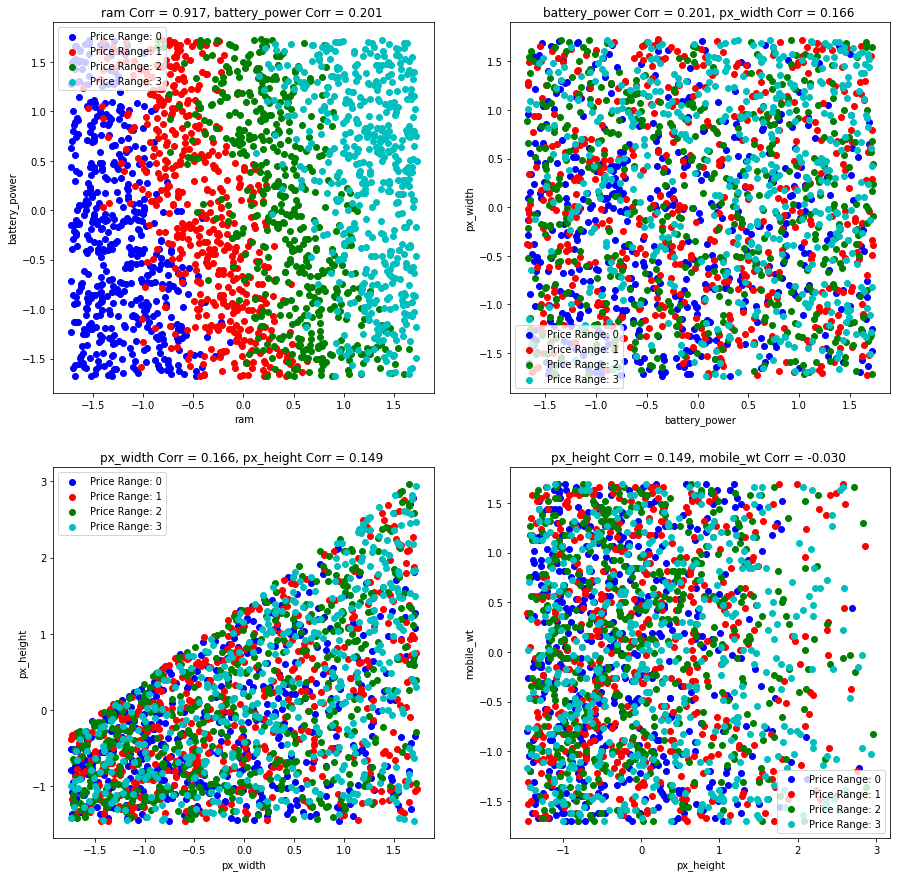

In [390]:
# scatterplot of features with strongest negative correlation with the target

fig = plt.figure(figsize = (15,15))


for i in range(4):
    
    fig.add_subplot(2,2,i+1)
    
    ax_1 = corr_df.values[i,0]

    ax_2 = corr_df.values[i + 1,0]

    plt.scatter(X_rf[ax_1].values[np.where(y == 0)[0]],
            X_rf[ax_2].values[np.where(y == 0)[0]],
           c = 'b')

    plt.scatter(X_rf[ax_1].values[np.where(y == 1)[0]],
            X_rf[ax_2].values[np.where(y == 1)[0]],
           c = 'r')
    
    plt.scatter(X_rf[ax_1].values[np.where(y == 2)[0]],
            X_rf[ax_2].values[np.where(y == 2)[0]],
           c = 'g')

    plt.scatter(X_rf[ax_1].values[np.where(y == 3)[0]],
            X_rf[ax_2].values[np.where(y == 3)[0]],
           c = 'c')
    
    plt.xlabel(ax_1)
    plt.ylabel(ax_2)
    plt.title('{} Corr = {:.3f}, {} Corr = {:.3f} '.format(ax_1,corr_df.values[i,1], 
                                                           ax_2,corr_df.values[i + 1,1]))
    
    plt.legend(['Price Range: 0','Price Range: 1', 'Price Range: 2', 'Price Range: 3'])
    
   

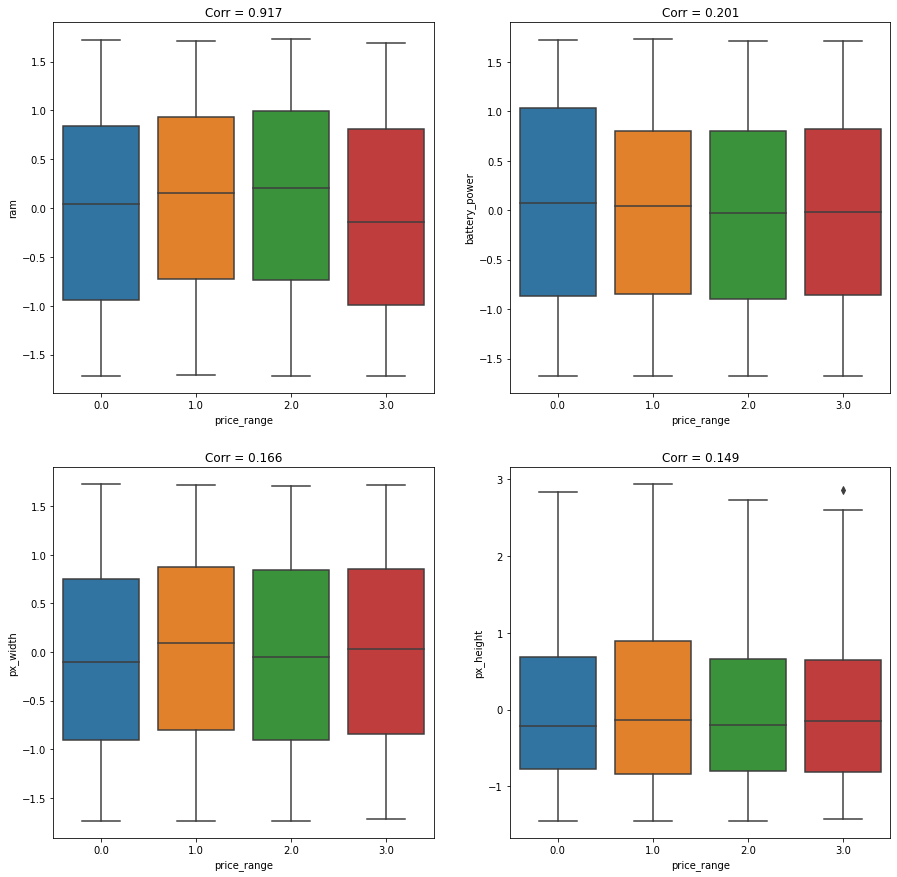

In [391]:
fig = plt.figure(figsize = (15,15))


for i in range(4):
    
    fig.add_subplot(2,2,i+1)
    
    ax = corr_df.values[i,0]
    

    plt.title('Corr = {:.3f}'.format(corr_df.values[i,1]))

    sns.boxplot(x = y.columns[0],
                y = X_rf[ax], 
              data = pd.concat([X_rf,y_clean],axis = 1))
            

## 4.2 PCA

Performing PCA, we can identify reduced dimension which explain most of the variance in the dataset.

In [392]:
from sklearn.decomposition import PCA

def get_pca(X, n_components):

    pca = PCA(n_components = n_components)

    pca.fit(X)

    X_pca = pca.fit_transform(X)

    X_pca = pd.DataFrame(X_pca)
    
    fn = []
    
    for i in range(n_components):
        
        fn.append('component ' + str(i + 1))
        
    X_pca.columns = fn
    
    pve = pca.explained_variance_ratio_
    
    #for i in range(n_components):
    
       # print('PVE component {}: {:.1f} %'.format(i + 1, pve[i] * 100))
    print('Cumulative PVE with {} components: {:.1f}%'.format(n_components,sum(pve)*100))
    
    return X_pca, pca, pve

def get_scree_plot(X,n_components):
    
    cumulative_pve = np.zeros((len(n_components)))
    
    for i,n in enumerate(n_components):
        
        _, _, pve = get_pca(X,n)
        
        
        cumulative_pve[i] += 100 * sum(pve)
        
    fig = plt.figure(figsize = (5,5))
        
    plt.plot(n_components, cumulative_pve,'bo-')
    plt.xlabel('N. components')
    plt.ylabel('Cumulative PVE')
        
        
# the biplot illustrates the loading vectors of each features and 
# the data plotted in the principal component space

# in an element phi_jm of the loading vector phi_m of the feature m associated with the feature j
# has a high positive value, it means that the feature j has a high contribution to the component m


def get_biplot(X_pca,y,comp_ax_hor,comp_ax_ver,features_names):
    
    score = X_pca.values
    coeff = np.transpose(pca.components_[[comp_ax_hor-1,comp_ax_ver-1], :])
    
    
    ax_1 = score[:,0]
    ax_2 = score[:,1]
    n = coeff.shape[0]
    scale_ax_1 = 1.0/(ax_1.max() - ax_1.min())
    scale_ax_2 = 1.0/(ax_2.max() - ax_2.min())
    
    fig = plt.figure(figsize = (10,10))
    plt.scatter(ax_1[np.where(y == 0)[0]] * scale_ax_1,
                ax_2[np.where(y == 0)[0]] * scale_ax_2,
                c = 'b',
                s = 5)
    

    plt.scatter(ax_1[np.where(y == 1)[0]] * scale_ax_1,
                ax_2[np.where(y == 1)[0]] * scale_ax_2,
                c = 'r',
                s=5)
    
    plt.scatter(ax_1[np.where(y == 2)[0]] * scale_ax_1,
                ax_2[np.where(y == 2)[0]] * scale_ax_2,
                c = 'g',
                s=5)
    

    plt.scatter(ax_1[np.where(y == 3)[0]] * scale_ax_1,
                ax_2[np.where(y == 3)[0]] * scale_ax_2,
                c = 'c',
                s=5)
    
    plt.xlabel('Component {}'.format(comp_ax_hor))
    plt.ylabel('Component {}'.format(comp_ax_ver))
    plt.legend(['Price Range: 0','Price Range: 1', 'Price Range: 2', 'Price Range: 3'])
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if features_names is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, features_names[i], color = 'g', ha = 'center', va = 'center')
        


Cumulative PVE with 1 components: 30.2%
Cumulative PVE with 2 components: 50.3%
Cumulative PVE with 3 components: 70.3%
Cumulative PVE with 4 components: 90.2%
Cumulative PVE with 5 components: 100.0%


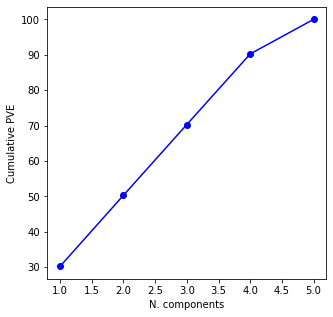

In [395]:
get_scree_plot(X_rf, n_components = [1,2,3,4,5])

Cumulative PVE with 2 components: 50.3%


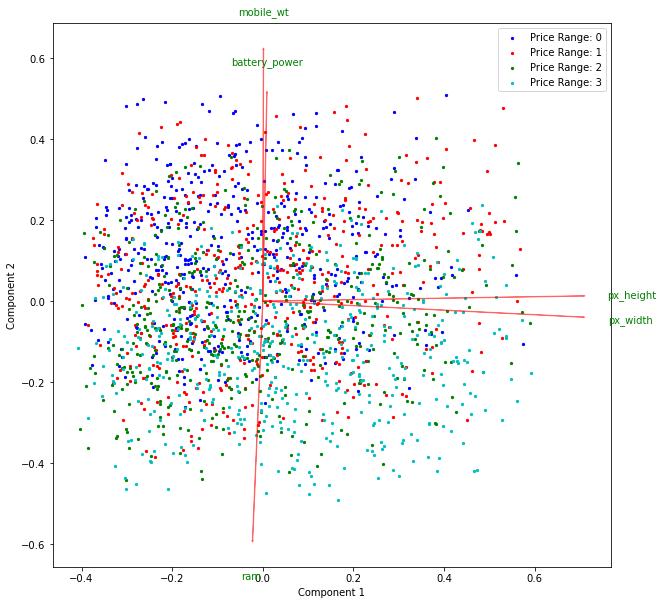

In [438]:
X_pca,pca,_ = get_pca(X_rf, n_components = 2)

comp_ax_hor = 1

comp_ax_ver = 2

features_names = X_rf.columns

get_biplot(X_pca,y,comp_ax_hor, comp_ax_ver, features_names )

# 5. Training-Test Splitting

In [398]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rf,y, test_size = 0.33, random_state = 42)

# 6. Fitting Classifiers

In [399]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,precision_recall_curve,plot_roc_curve,plot_precision_recall_curve
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier


def plot_classification_performance(clf,X,y_true, step, binary,ovr):
   
    '''
    performance of classification is evaluated with:
    
    1) accuracy: (TP + TN)/(TP + TN + FP + FN)
    
    2) precision: TP / (TP + FP)
    
    3) recall (sensitivity, true positive rate): TP / (TP + FN)
    
    4) f_score: 2 * precision * recall / (precision + recall)
    
    5) precsion_recall_curve: x-axis: precision, y-axis: recall
    
    6) roc_curve: x-axis: true positive rate, y-axis: false positive rate
                
                true positive rate (recall, sensitivity): TP / (TP + FN)
                false positive rate (fall out, 1 - specificity): FP / (FP + TN) = 1 - specificity = 1 - TN / (TN + FP)
                
                specifity (or true negative rate): TN / (TN + FP) 
                
    ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
    
    Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
    
    ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
    
    7) confusion_matrix = [TP  FP
                           FN  TN]  
    
    '''
    
    accuracy = clf.score(X,y_true)
    
    if binary:
    
       
    
        y_pred = clf.predict(X)
        
        report = classification_report(y_true,y_pred)
        print('{} Classification Report'.format(step))
        print(report)
    
    
        plot_roc_curve(clf, X, y_true)
        plt.title('{} ROC curve'.format(step))
    
        plot_precision_recall_curve(clf, X, y_true)
        plt.title('{} Precision Recall curve'.format(step))
        
        
        plot_confusion_matrix(clf,X, y_true)
        plt.title('{} Confusion Matrix'.format(step))
        
    else:
        
        
        n_classes = len(clf.classes_)
        
        if ovr:
            
            y_score = clf.predict_proba(X)
            
        else:
            
            y_score = clf.decision_function(X)
            
        y_pred = clf.predict(X)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
    
        precision = dict()
        recall = dict()
        f_score = dict()
    
        y_true_dummies = pd.get_dummies(y_true, drop_first = False).values
    
        for i in range(n_classes):
        
            fpr[i], tpr[i], _ = roc_curve(y_true_dummies[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
            precision[i], recall[i],_ =  precision_recall_curve(y_true_dummies[:, i], y_score[:, i])
            
        report = classification_report(y_true,y_pred)
        print('{} Classification Report'.format(step))
        print(report)
                                                                
       
    
        figsize=(8, 5)
        fig, ax = plt.subplots(figsize = figsize)
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('{} ROC curve'.format(step))
        
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label = 'Class {} (area = {:.2f})'.format(i, roc_auc[i]))
    
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        sns.despine()
        plt.show()
    
        figsize=(8, 5)
        fig, ax = plt.subplots(figsize = figsize)

        ax.set_xlabel('Precision')
        ax.set_ylabel('Recall')
        ax.set_title('{} Precision Recall curve'.format(step))
        
        for i in range(n_classes):
            ax.plot(precision[i], recall[i], label = 'Class {}'.format(i))
        
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        sns.despine()
        plt.show()
    
        figsize=(8, 5)
        plot_confusion_matrix(clf,X,y_true)
        
        
    

## 6.1 Logistic Regression

### 6.1.1OVR

In [400]:
from sklearn.linear_model import LogisticRegression

penalty = 'l2'
C = 1e6
fit_intercept = True
multi_class = 'ovr'

log_reg = LogisticRegression(penalty = penalty, 
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)

log_reg.fit(X_train, y_train.values.ravel())


LogisticRegression(C=1000000.0, multi_class='ovr')

Train Classification Report
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       331
         1.0       0.80      0.77      0.78       338
         2.0       0.78      0.78      0.78       338
         3.0       0.97      0.99      0.98       333

    accuracy                           0.88      1340
   macro avg       0.88      0.88      0.88      1340
weighted avg       0.88      0.88      0.88      1340



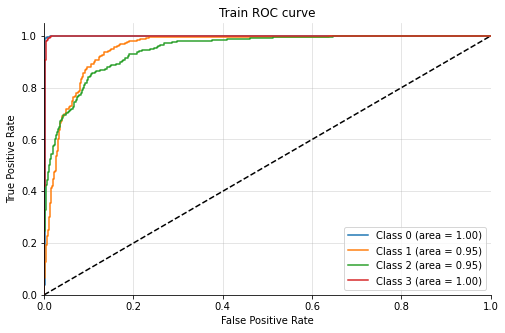

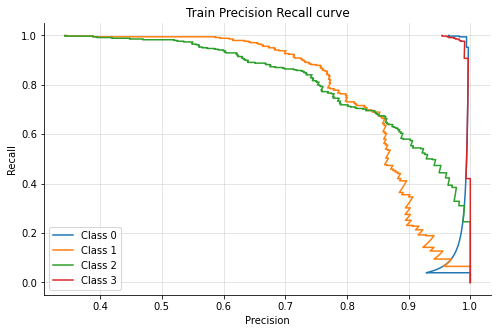

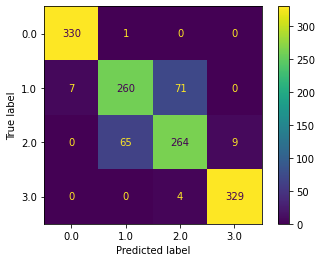

In [401]:
plot_classification_performance(log_reg, X_train,y_train.values.ravel(), step ='Train', binary = False, ovr = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       169
         1.0       0.79      0.80      0.79       162
         2.0       0.79      0.77      0.78       162
         3.0       0.98      0.99      0.98       167

    accuracy                           0.89       660
   macro avg       0.89      0.89      0.89       660
weighted avg       0.89      0.89      0.89       660



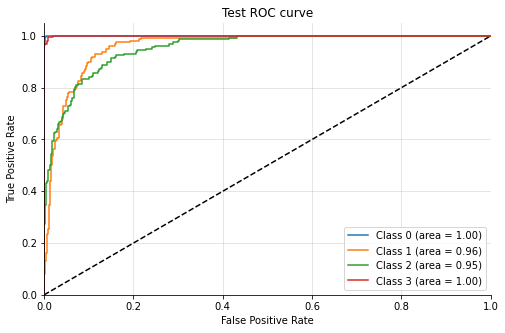

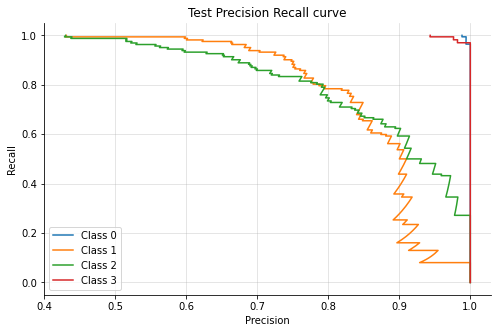

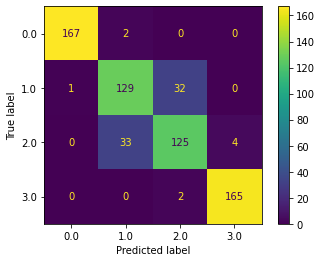

In [402]:
plot_classification_performance(log_reg, X_test,y_test.values.ravel(), step ='Test', binary = False, ovr = True)

### 6.1.2 OVO

In [403]:
C = 1
penalty = 'l2'
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)

ovo = OneVsOneClassifier(log_reg)

ovo.fit(X_train, y_train.values.ravel())

OneVsOneClassifier(estimator=LogisticRegression(C=1))

Train Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       331
         1.0       0.96      0.96      0.96       338
         2.0       0.97      0.95      0.96       338
         3.0       0.98      0.98      0.98       333

    accuracy                           0.97      1340
   macro avg       0.97      0.97      0.97      1340
weighted avg       0.97      0.97      0.97      1340



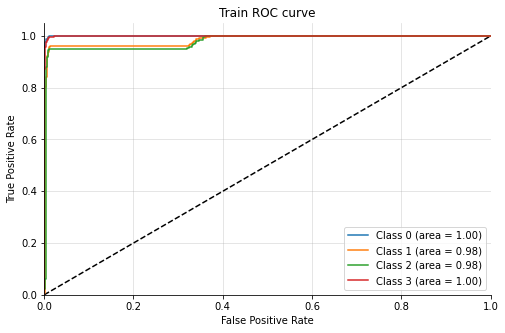

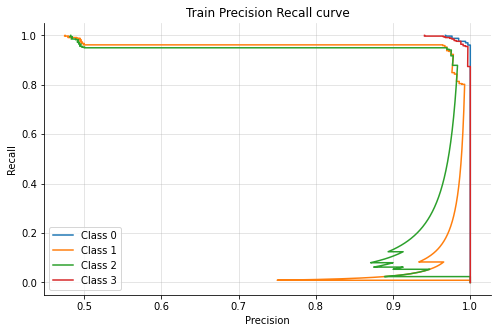

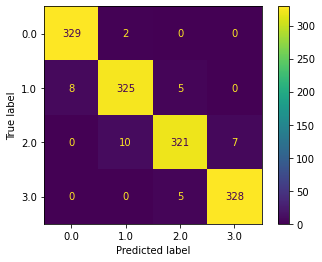

In [404]:
plot_classification_performance(ovo, X_train,y_train.values.ravel(), step ='Train', binary = False, ovr = False)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       169
         1.0       0.96      0.99      0.97       162
         2.0       0.97      0.94      0.96       162
         3.0       0.98      0.98      0.98       167

    accuracy                           0.98       660
   macro avg       0.98      0.98      0.98       660
weighted avg       0.98      0.98      0.98       660



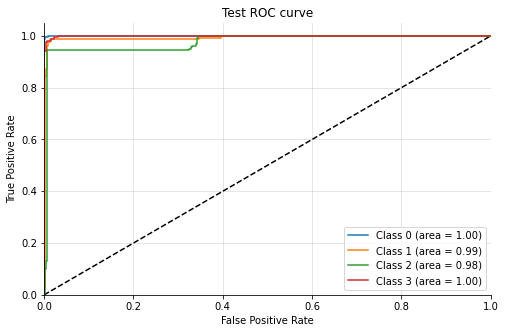

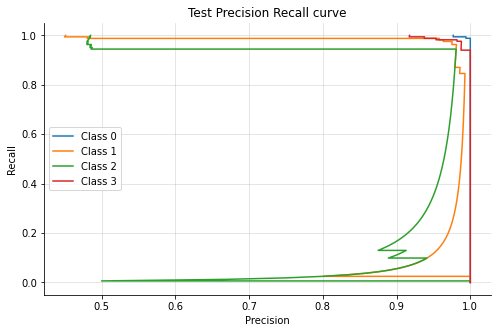

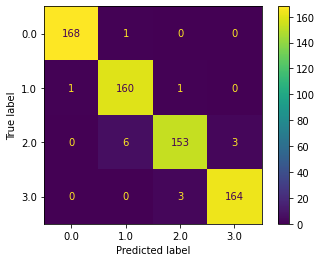

In [405]:
plot_classification_performance(ovo, X_test,y_test.values.ravel(), step ='Test', binary = False, ovr = False)

## 6.2 Random Forest Classifier

### 6.2.1 OVR

In [406]:
rf = RandomForestClassifier(ccp_alpha = 0.005)

ovr = OneVsRestClassifier(rf)

ovr.fit(X_train, y_train.values.ravel())

OneVsRestClassifier(estimator=RandomForestClassifier(ccp_alpha=0.005))

Train Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       331
         1.0       0.92      0.91      0.91       338
         2.0       0.88      0.91      0.89       338
         3.0       0.96      0.93      0.95       333

    accuracy                           0.93      1340
   macro avg       0.93      0.93      0.93      1340
weighted avg       0.93      0.93      0.93      1340



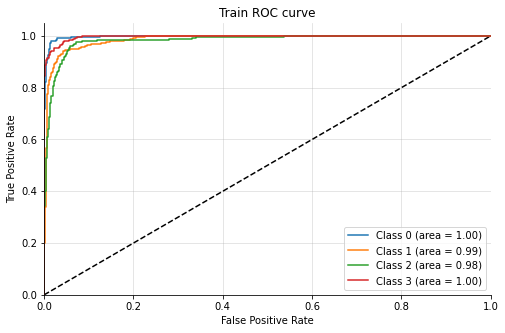

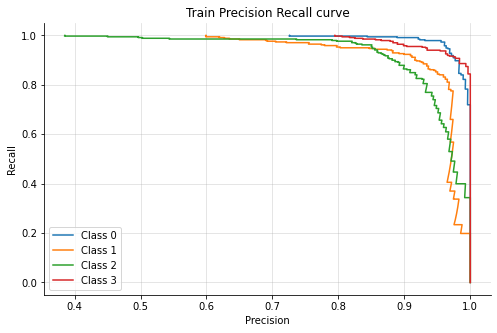

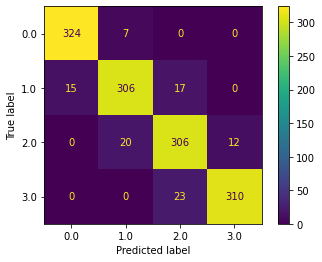

In [407]:
plot_classification_performance(ovr, X_train,y_train.values.ravel(), step ='Train', binary = False, ovr = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       169
         1.0       0.85      0.87      0.86       162
         2.0       0.80      0.79      0.80       162
         3.0       0.90      0.87      0.88       167

    accuracy                           0.87       660
   macro avg       0.87      0.87      0.87       660
weighted avg       0.87      0.87      0.87       660



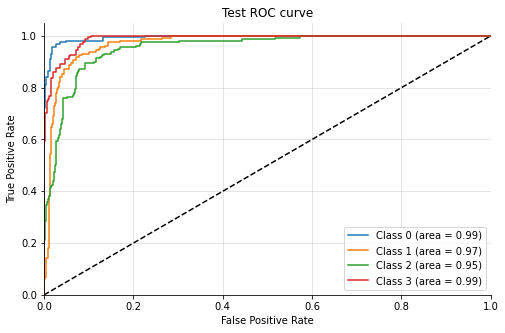

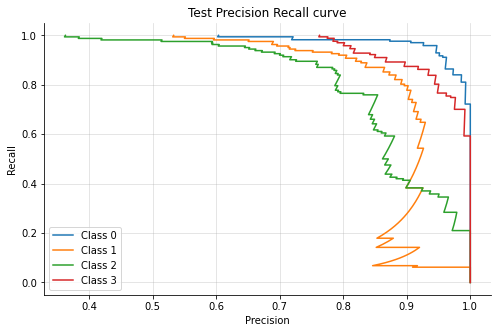

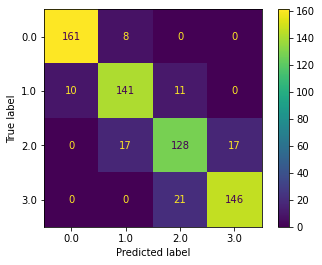

In [408]:
plot_classification_performance(ovr, X_test,y_test.values.ravel(), step ='Test', binary = False, ovr = True)

### 6.2.2 OVO

In [409]:
rf = RandomForestClassifier(ccp_alpha = 0.005)

ovo = OneVsOneClassifier(rf)

ovo.fit(X_train, y_train.values.ravel())

OneVsOneClassifier(estimator=RandomForestClassifier(ccp_alpha=0.005))

Train Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       331
         1.0       0.96      0.96      0.96       338
         2.0       0.93      0.95      0.94       338
         3.0       0.98      0.95      0.96       333

    accuracy                           0.96      1340
   macro avg       0.96      0.96      0.96      1340
weighted avg       0.96      0.96      0.96      1340



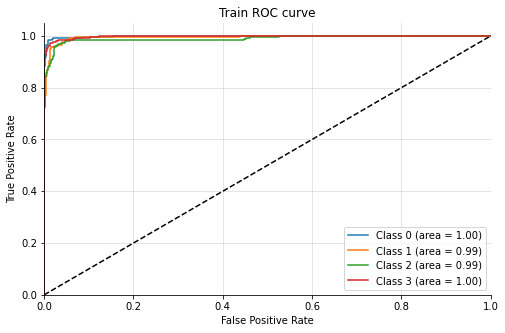

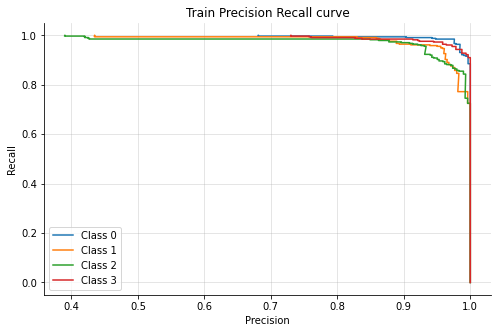

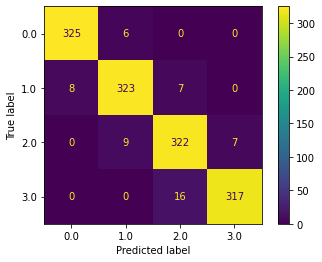

In [410]:
plot_classification_performance(ovo, X_train,y_train.values.ravel(), step ='Train', binary = False, ovr = False)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       169
         1.0       0.84      0.89      0.86       162
         2.0       0.83      0.84      0.83       162
         3.0       0.93      0.89      0.91       167

    accuracy                           0.89       660
   macro avg       0.89      0.89      0.89       660
weighted avg       0.89      0.89      0.89       660



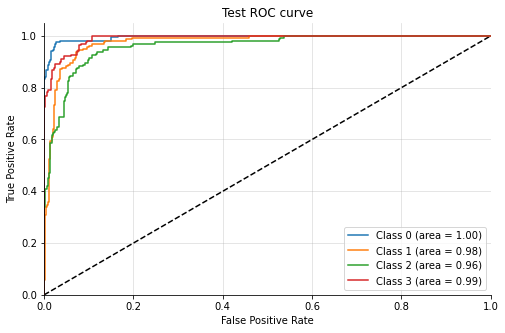

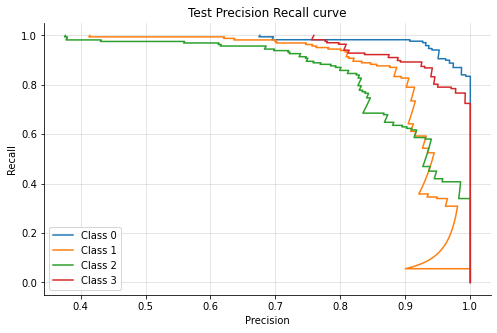

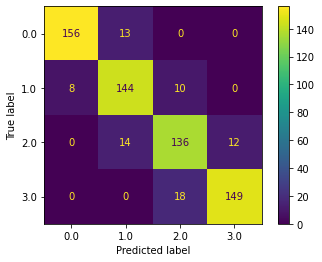

In [411]:
plot_classification_performance(ovo, X_test,y_test.values.ravel(), step ='Test', binary = False, ovr = False)

## 6.3 K-Nearest Neighbors with K chosen via Cross-Validation

In [412]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Cross-Val Accuracy')

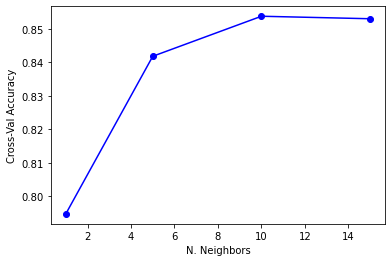

In [413]:
from sklearn.neighbors import KNeighborsClassifier


cv = 10

k_values = [1,5,10,15]

cv_score = []


for k in k_values:
    


    knn  = KNeighborsClassifier(n_neighbors = k)
    
    cross_val = cross_val_score(estimator = knn, X = X_train, y = y_train.values.ravel(), cv = cv)
    
    cv_score.append(np.average(cross_val))
    
    
plt.plot(np.array(k_values),np.array(cv_score),'bo-')

plt.xlabel('N. Neighbors')
plt.ylabel('Cross-Val Accuracy')

### 6.3.1 OVR

In [414]:
knn = KNeighborsClassifier(n_neighbors = 20)

ovr = OneVsRestClassifier(knn)

ovr.fit(X_train, y_train.values.ravel())

OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=20))

Train Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       331
         1.0       0.84      0.90      0.87       338
         2.0       0.86      0.86      0.86       338
         3.0       0.93      0.93      0.93       333

    accuracy                           0.90      1340
   macro avg       0.90      0.90      0.90      1340
weighted avg       0.90      0.90      0.90      1340



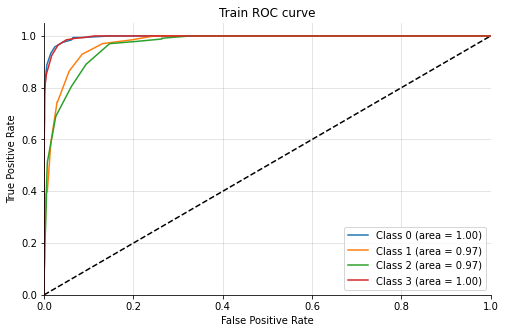

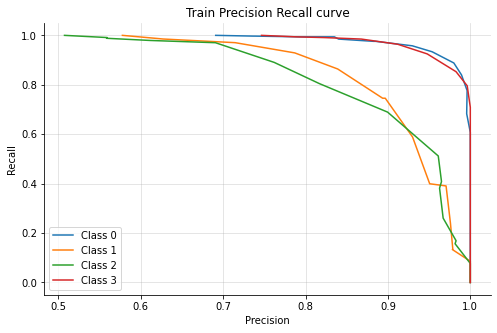

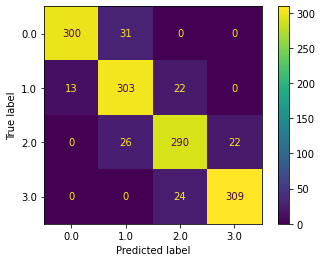

In [415]:
plot_classification_performance(ovr, X_train,y_train.values.ravel(), step ='Train', binary = False, ovr = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       169
         1.0       0.78      0.83      0.81       162
         2.0       0.76      0.85      0.80       162
         3.0       0.94      0.87      0.91       167

    accuracy                           0.86       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.87      0.86      0.86       660



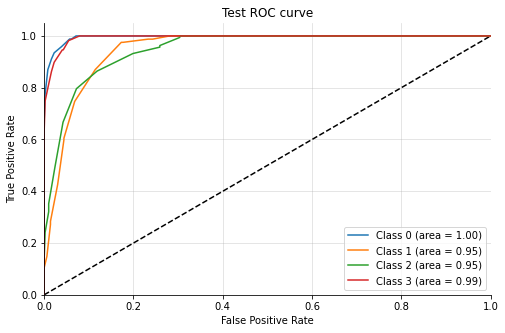

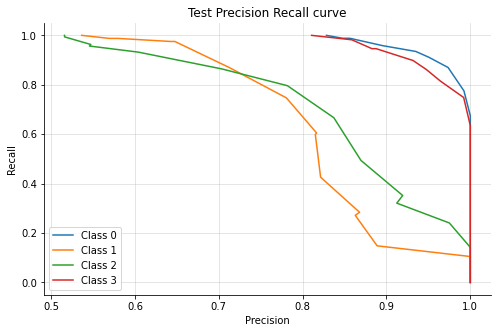

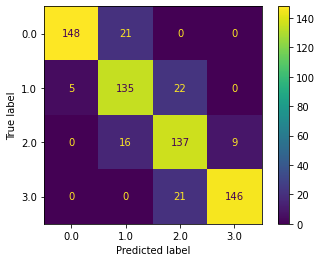

In [416]:
plot_classification_performance(ovr, X_test,y_test.values.ravel(), step ='Test', binary = False, ovr = True)

### 6.3.1 OVO

In [417]:
knn = KNeighborsClassifier(n_neighbors = 20)

ovo = OneVsOneClassifier(knn)

ovo.fit(X_train, y_train.values.ravel())

OneVsOneClassifier(estimator=KNeighborsClassifier(n_neighbors=20))

Train Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       331
         1.0       0.83      0.89      0.86       338
         2.0       0.82      0.85      0.83       338
         3.0       0.97      0.86      0.91       333

    accuracy                           0.88      1340
   macro avg       0.89      0.88      0.88      1340
weighted avg       0.89      0.88      0.88      1340



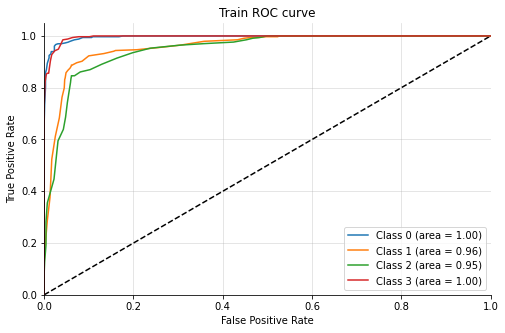

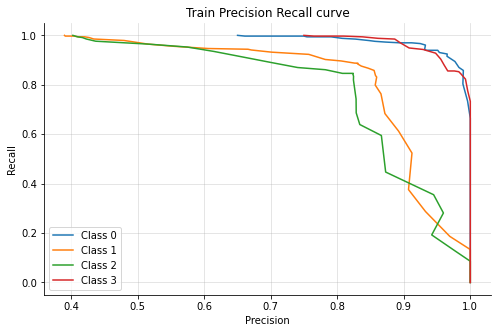

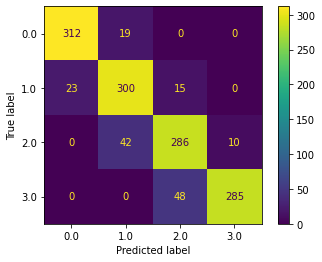

In [418]:
plot_classification_performance(ovo, X_train,y_train.values.ravel(), step ='Train', binary = False, ovr = False)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       169
         1.0       0.78      0.85      0.82       162
         2.0       0.78      0.83      0.80       162
         3.0       0.97      0.84      0.90       167

    accuracy                           0.86       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.87      0.86      0.86       660



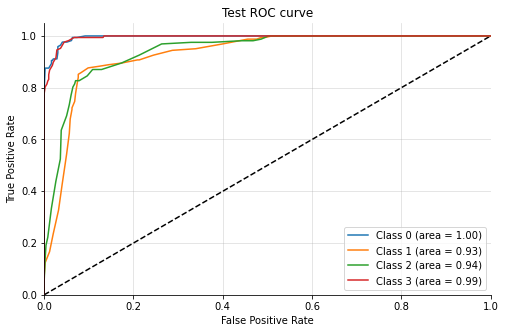

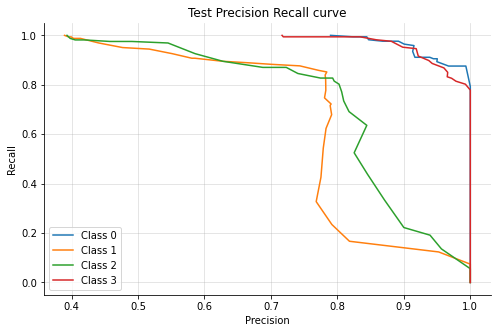

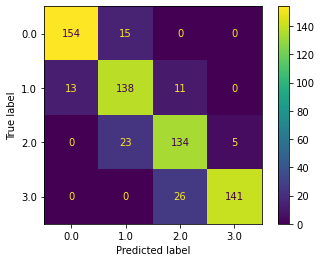

In [419]:
plot_classification_performance(ovo, X_test,y_test.values.ravel(), step ='Test', binary = False, ovr = False)

# 7. k-means

In [421]:
from sklearn.cluster import KMeans

def get_kmeans(X,n_clusters):
    
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', n_init = 10)

    kmeans.fit(X)
    
    clusters = []
    
    for cluster_index in range(n_clusters):
        
        cluster = X[kmeans.predict(X) == cluster_index].values
        
        centroid = kmeans.cluster_centers_[cluster_index].reshape(1,-1)
                
        cluster = np.concatenate([centroid, cluster], axis = 0)
        
        cluster = pd.DataFrame(cluster)
        
        cluster.columns = X.columns
        
        clusters.append(cluster)
        
        wcss = kmeans.inertia_
    
    return clusters, wcss


def plot_WCSS(X,n_clusters):
    
    WCSS = []
    
    for n in n_clusters:
        
        _,wcss = get_kmeans(X,n)
        
        WCSS.append(wcss)
        
    fig = plt.figure(figsize = (10,5))
    
    plt.plot(n_clusters,WCSS/np.max(WCSS),'bo-')
    plt.xlabel('N. cluster')
    plt.ylabel('Normalized WCSS')
    

def plot_clusters(X, n_clusters,hor,ver):
    
    clusters,_ = get_kmeans(X, n_clusters)
    

 
    fig = plt.figure(figsize = (10,10))
    
    for cluster_index in range(n_clusters):
        
        cluster = clusters[cluster_index].values
    
        plt.scatter(cluster[0][hor - 1], cluster[0][ver - 1],
            c = 'r',
            marker ='*', 
           linewidths = 5)
        
        
        if clusters[cluster_index][1:].shape[0] > 1:
        
            plt.scatter(cluster[1:,hor - 1], cluster[1:,ver - 1])
        
            plt.xlabel(X.columns[hor - 1])
            plt.ylabel(X.columns[ver - 1])
            
    
        

    
    

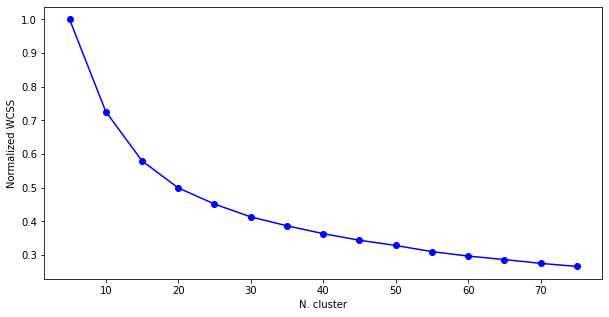

In [426]:
n_clusters = np.arange(5,80,5)

plot_WCSS(X_rf,n_clusters)

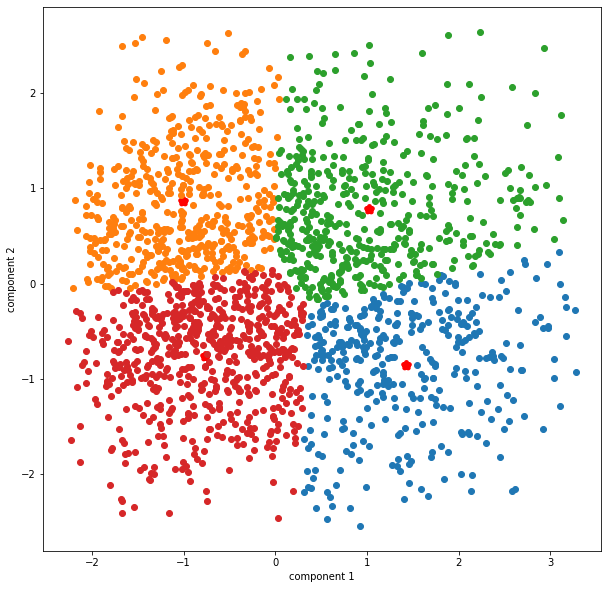

In [442]:
n_clusters = 4


hor = 1

ver = 2

plot_clusters(X_pca,n_clusters, hor,ver)